In [12]:
from IPython.display import display, Math, Latex

# Load Dataset

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('Acoustic Features.csv')

## **Pre-processing**

**Normalisasi data dengan Z-score**
$$ X(stand) = \frac{x - mean (x)}{std_\text{dev}} $$
dimana $${mean = 0}, {std_\text{dev}} = 1 $$

In [36]:
def normalize(data):
    # Compute the means and standard deviations of each column using pandas methods
    means = data.mean(axis=0)
    stds = data.std(axis=0)
    # Normalize the data by subtracting the means and dividing by the standard deviations using pandas broadcasting
    data = (data - means) / stds
    # Return the normalized data
    return data

Setelah data dinormalisasi, selanjutnya ialah PCA

- menghitung covariance matrix
\begin{align}
        Cov (\sum) = \begin{pmatrix}
        cov (x_1,x_1) & cov(x_1,x_2) & ... & cov(x_1,x_m) \\
        | & | & | & | \\
        cov (x_m,x_1) & cov(x_m,x_2) & ... & cov(x_m,x_m)
        \end{pmatrix}
    \end{align}
  di mana \(X\) adalah matriks data yang memiliki dimensi \(n x m\), dengan \(n\) adalah jumlah sampel dan \(m\) adalah jumlah fitur.
- menghitung eigenvalue dan eigenvector
$$ AX = λX $$

In [37]:
# drop duplicate
df = df.drop_duplicates(keep='first')

In [38]:
# Split feature and target
X = df.drop(columns=['Class'])
y = df['Class']

In [39]:
X = normalize(X)
X

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,-1.272863,0.724549,0.910332,0.184485,1.940591,0.533531,1.342709,0.176184,0.194331,0.383737,...,0.207447,1.143513,-1.063516,-0.825846,-0.221041,1.447311,0.166633,-0.794990,-2.447998,0.849226
1,-0.141269,-2.270546,-0.198455,0.542841,2.017159,0.817391,0.998348,1.320472,1.910184,3.700735,...,-1.057144,1.143513,-1.088927,1.695816,-0.779237,0.384200,-0.791482,1.701411,-0.935784,0.074540
2,-1.365871,1.670369,1.561337,1.891824,0.406721,1.535389,0.042915,1.076549,0.532379,0.490894,...,-0.514324,0.435849,-1.038105,1.741509,1.525571,2.255275,1.278046,-0.101486,-1.074519,-0.958374
3,0.013743,0.961004,1.499939,-1.697403,0.489565,2.739475,0.414284,1.155465,-0.881279,0.505506,...,-0.949773,1.143513,-0.577529,1.047552,1.687627,1.532360,0.396581,-1.524938,-0.366969,0.332769
4,-1.055845,0.724549,1.196106,-1.024616,0.961525,0.283066,1.096254,0.240752,1.285306,1.197156,...,-1.051179,-0.516990,2.087458,-1.111424,0.301142,1.447311,0.846895,-1.102619,-1.324242,-2.507745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.618294,0.468390,-0.837272,1.098253,0.670316,-0.019347,0.772150,0.061397,0.419696,0.315546,...,0.052356,0.692168,0.222920,-0.757307,-0.094997,-1.125418,1.143910,0.980038,1.353348,0.590997
396,0.649296,-1.107976,-0.937947,1.645996,0.425549,-0.414524,-0.497260,-0.143068,-0.789084,-0.001054,...,-1.003458,1.143513,0.943959,-1.085722,-1.715565,-1.401827,1.383439,1.701411,1.519830,0.074540
397,0.819810,0.054594,-1.081512,0.301685,-0.977778,0.910155,1.319076,-0.508954,0.312135,0.851331,...,-0.908018,-1.129927,-0.177304,-0.825846,-1.067338,-0.763960,1.057680,1.701411,0.687419,-1.216602
398,0.091250,0.369867,-1.196183,-0.298621,-0.569834,-0.529552,0.691124,0.215643,0.117501,0.110973,...,-0.654503,1.143513,-0.123306,-0.714470,-0.923287,-1.040369,0.578622,1.701411,0.576431,0.590997


### **One-hot Encoding for y**

In [18]:
y = pd.get_dummies(y, columns = ['Class'])
y

,angry,happy,relax,sad
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
395,True,False,False,False
396,True,False,False,False
397,True,False,False,False
398,True,False,False,False


# **Training**

## **Fungsi Aktifasi:**

- Sigmoid:
$$\sigma(x) = \frac{1}{1 + e^{-x}} $$
$$\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))$$
- Softmax:
$${softmax}(x_i) = \frac{e^{x_i - \max(x)}}{\sum{e^{x - \max(x)}}} $$
$$ softmax'(x) = $$
- ReLU
$${ReLU}(x) = \max(0, x) $$
$${ReLU}'(x) = \begin{cases} 1 & \text{jika } x > 0 \\ 0 & \text{jika } x \leq 0 \end{cases} $$


**Loss Function:**
- Categorical Cross-Entropy:
$${CCE}(y_{\text{true}}, y_{\text{pred}}) = -\frac{1}{N} \sum{y_{\text{true}} \cdot \log(y_{\text{pred}})} $$
- Turunan Categorical Cross-Entropy:
   $${CCE}'(y_{\text{true}}, y_{\text{pred}}) = -\frac{y_{\text{true}}}{y_{\text{pred}}}$$


In [19]:
import numpy as np

np.random.seed(42)

# Define the ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return (x > 0).astype(float)

# Define the softmax activation function and its derivative
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def softmax_prime(x):
    s = softmax(x)
    return s * (1 - s)

# Define the loss functions and their derivatives
def categorical_crossentropy(y_true, y_pred):
    # Clip the predictions to avoid log(0) error
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Compute the cross entropy
    return -np.mean(y_true * np.log(y_pred))

def categorical_crossentropy_derivative(y_true, y_pred):
    # Clip the predictions to avoid division by zero error
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Compute the derivative of cross entropy
    return - (y_true / y_pred)

In [20]:
# Define a class for the input layer
class InputLayer:
    def __init__(self, input_size):
        self.input_size = input_size

class HiddenLayer:
    def __init__(self, input_size, hidden_size, activation=relu, activation_prime=relu_prime):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.activation = activation
        self.activation_prime = activation_prime
        self.W = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.b = np.random.randn(hidden_size) * 0.01

    def forward(self, X):
        self.Z = X.dot(self.W) + self.b
        self.A = self.activation(self.Z)
        return self.A

    def backward(self, X, dA):
        if self.activation_prime == softmax_prime:  # output layer
            self.dZ = dA
        else:  # hidden layer
            self.dZ = dA * self.activation_prime(self.Z)
        self.dW = X.T.dot(self.dZ) / X.shape[0]
        self.db = np.sum(self.dZ, axis=0) / X.shape[0]
        self.dX = self.dZ.dot(self.W.T)
        return self.dX

    def update(self, learning_rate):
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

In [21]:
# Define a class for the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_layer = InputLayer(input_size)
        self.hidden_layer = HiddenLayer(input_size, hidden_size)
        self.output_layer = HiddenLayer(hidden_size, output_size, activation=softmax, activation_prime=softmax_prime)
        self.learning_rate = learning_rate
        self.loss = lambda y_true, y_pred: -np.sum(y_true * np.log(y_pred + 1e-9)) / y_true.shape[0]

    def forward(self, X):
        A1 = self.hidden_layer.forward(X)
        A2 = self.output_layer.forward(A1)
        return A2

    def backward(self, X, y):
        dA2 = self.output_layer.A - y
        dA1 = self.output_layer.backward(self.hidden_layer.A, dA2)
        self.hidden_layer.backward(X, dA1)

    def update(self):
        self.hidden_layer.update(self.learning_rate)
        self.output_layer.update(self.learning_rate)

    def train(self, X, y, epochs):
        batch_size = 32
        accuracies = []
        losses = []
        for epoch in range(epochs):
            permutation = np.random.permutation(X.shape[0])
            X = X[permutation]
            y = y[permutation]
            n_batches = X.shape[0] // batch_size
            for i in range(n_batches):
                X_batch = X[i * batch_size : (i + 1) * batch_size]
                y_batch = y[i * batch_size : (i + 1) * batch_size]
                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch)
                self.update()
            y_pred = self.forward(X)
            loss = self.loss(y, y_pred)
            accuracy = np.mean(np.argmax(y, axis=1) == np.argmax(y_pred, axis=1))
            accuracies.append(accuracy)
            losses.append(loss)
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
        return losses, accuracies

## Train

Epoch 1, Loss: 1.0476, Accuracy: 0.5490
Epoch 2, Loss: 0.8244, Accuracy: 0.6778
Epoch 3, Loss: 0.6950, Accuracy: 0.7552
Epoch 4, Loss: 0.6025, Accuracy: 0.7887
Epoch 5, Loss: 0.5384, Accuracy: 0.8067
Epoch 6, Loss: 0.4864, Accuracy: 0.8144
Epoch 7, Loss: 0.4441, Accuracy: 0.8376
Epoch 8, Loss: 0.4098, Accuracy: 0.8582
Epoch 9, Loss: 0.3791, Accuracy: 0.8634
Epoch 10, Loss: 0.3556, Accuracy: 0.8840
Epoch 11, Loss: 0.3354, Accuracy: 0.8918
Epoch 12, Loss: 0.3188, Accuracy: 0.8969
Epoch 13, Loss: 0.3033, Accuracy: 0.8995
Epoch 14, Loss: 0.2895, Accuracy: 0.9149
Epoch 15, Loss: 0.2772, Accuracy: 0.9149
Epoch 16, Loss: 0.2665, Accuracy: 0.9124
Epoch 17, Loss: 0.2565, Accuracy: 0.9201
Epoch 18, Loss: 0.2472, Accuracy: 0.9227
Epoch 19, Loss: 0.2390, Accuracy: 0.9304
Epoch 20, Loss: 0.2312, Accuracy: 0.9304
Epoch 21, Loss: 0.2249, Accuracy: 0.9304
Epoch 22, Loss: 0.2167, Accuracy: 0.9381
Epoch 23, Loss: 0.2105, Accuracy: 0.9433
Epoch 24, Loss: 0.2044, Accuracy: 0.9485
Epoch 25, Loss: 0.1998, A

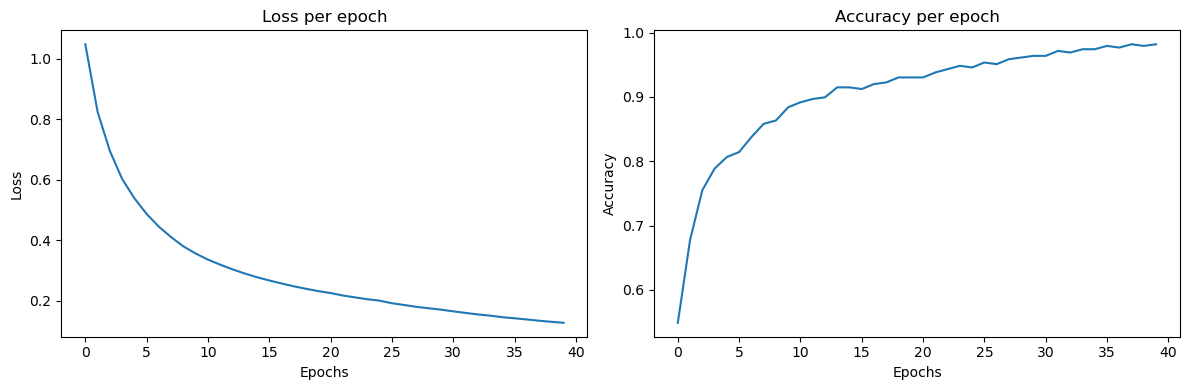

In [22]:

import matplotlib.pyplot as plt
# Create an instance of the neural network with 10 input features, 5 hidden units, and 3 output classes
nn = NeuralNetwork(X.shape[1], 8, y.shape[1], 0.1)

# Train the neural network for 20 epochs
losses , accuracies = nn.train(X.to_numpy(), y.to_numpy(), 40)

# Plotting the loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Uji Coba dengan PCA

In [23]:
# Import numpy and pandas libraries
import numpy as np
import pandas as pd

# Define a function to do a PCA
def do_pca(data, n_components):
  # data: a numpy array of shape (n_samples, n_features)
  # n_components: an integer specifying the number of principal components to keep
  # returns: a numpy array of shape (n_samples, n_components) containing the projected data

  # Calculate the covariance matrix of the data
  cov_matrix = np.cov(data.T)

  # Calculate the eigenvalues and eigenvectors of the covariance matrix
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues and eigenvectors in descending order
  idx = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[idx]
  eigenvectors = eigenvectors[:, idx]

  # Select the first n_components eigenvectors as the principal components
  pc = eigenvectors[:, :n_components]

  # Project the data onto the principal components
  transformed_data = np.dot(data, pc)

  # Return the transformed data
  return transformed_data

## Reduction for highly corellated data

Setelah melakukan perhitungan matriks korelasi, heatmap digambarkan dan dilihat secara total fitur apa yang memiliki korelasi tinggi. Kode dibawah hanya menampilkan korelasi heatmap untuk data yang memiliki korelasi tinggi diatas 0.8

In [24]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


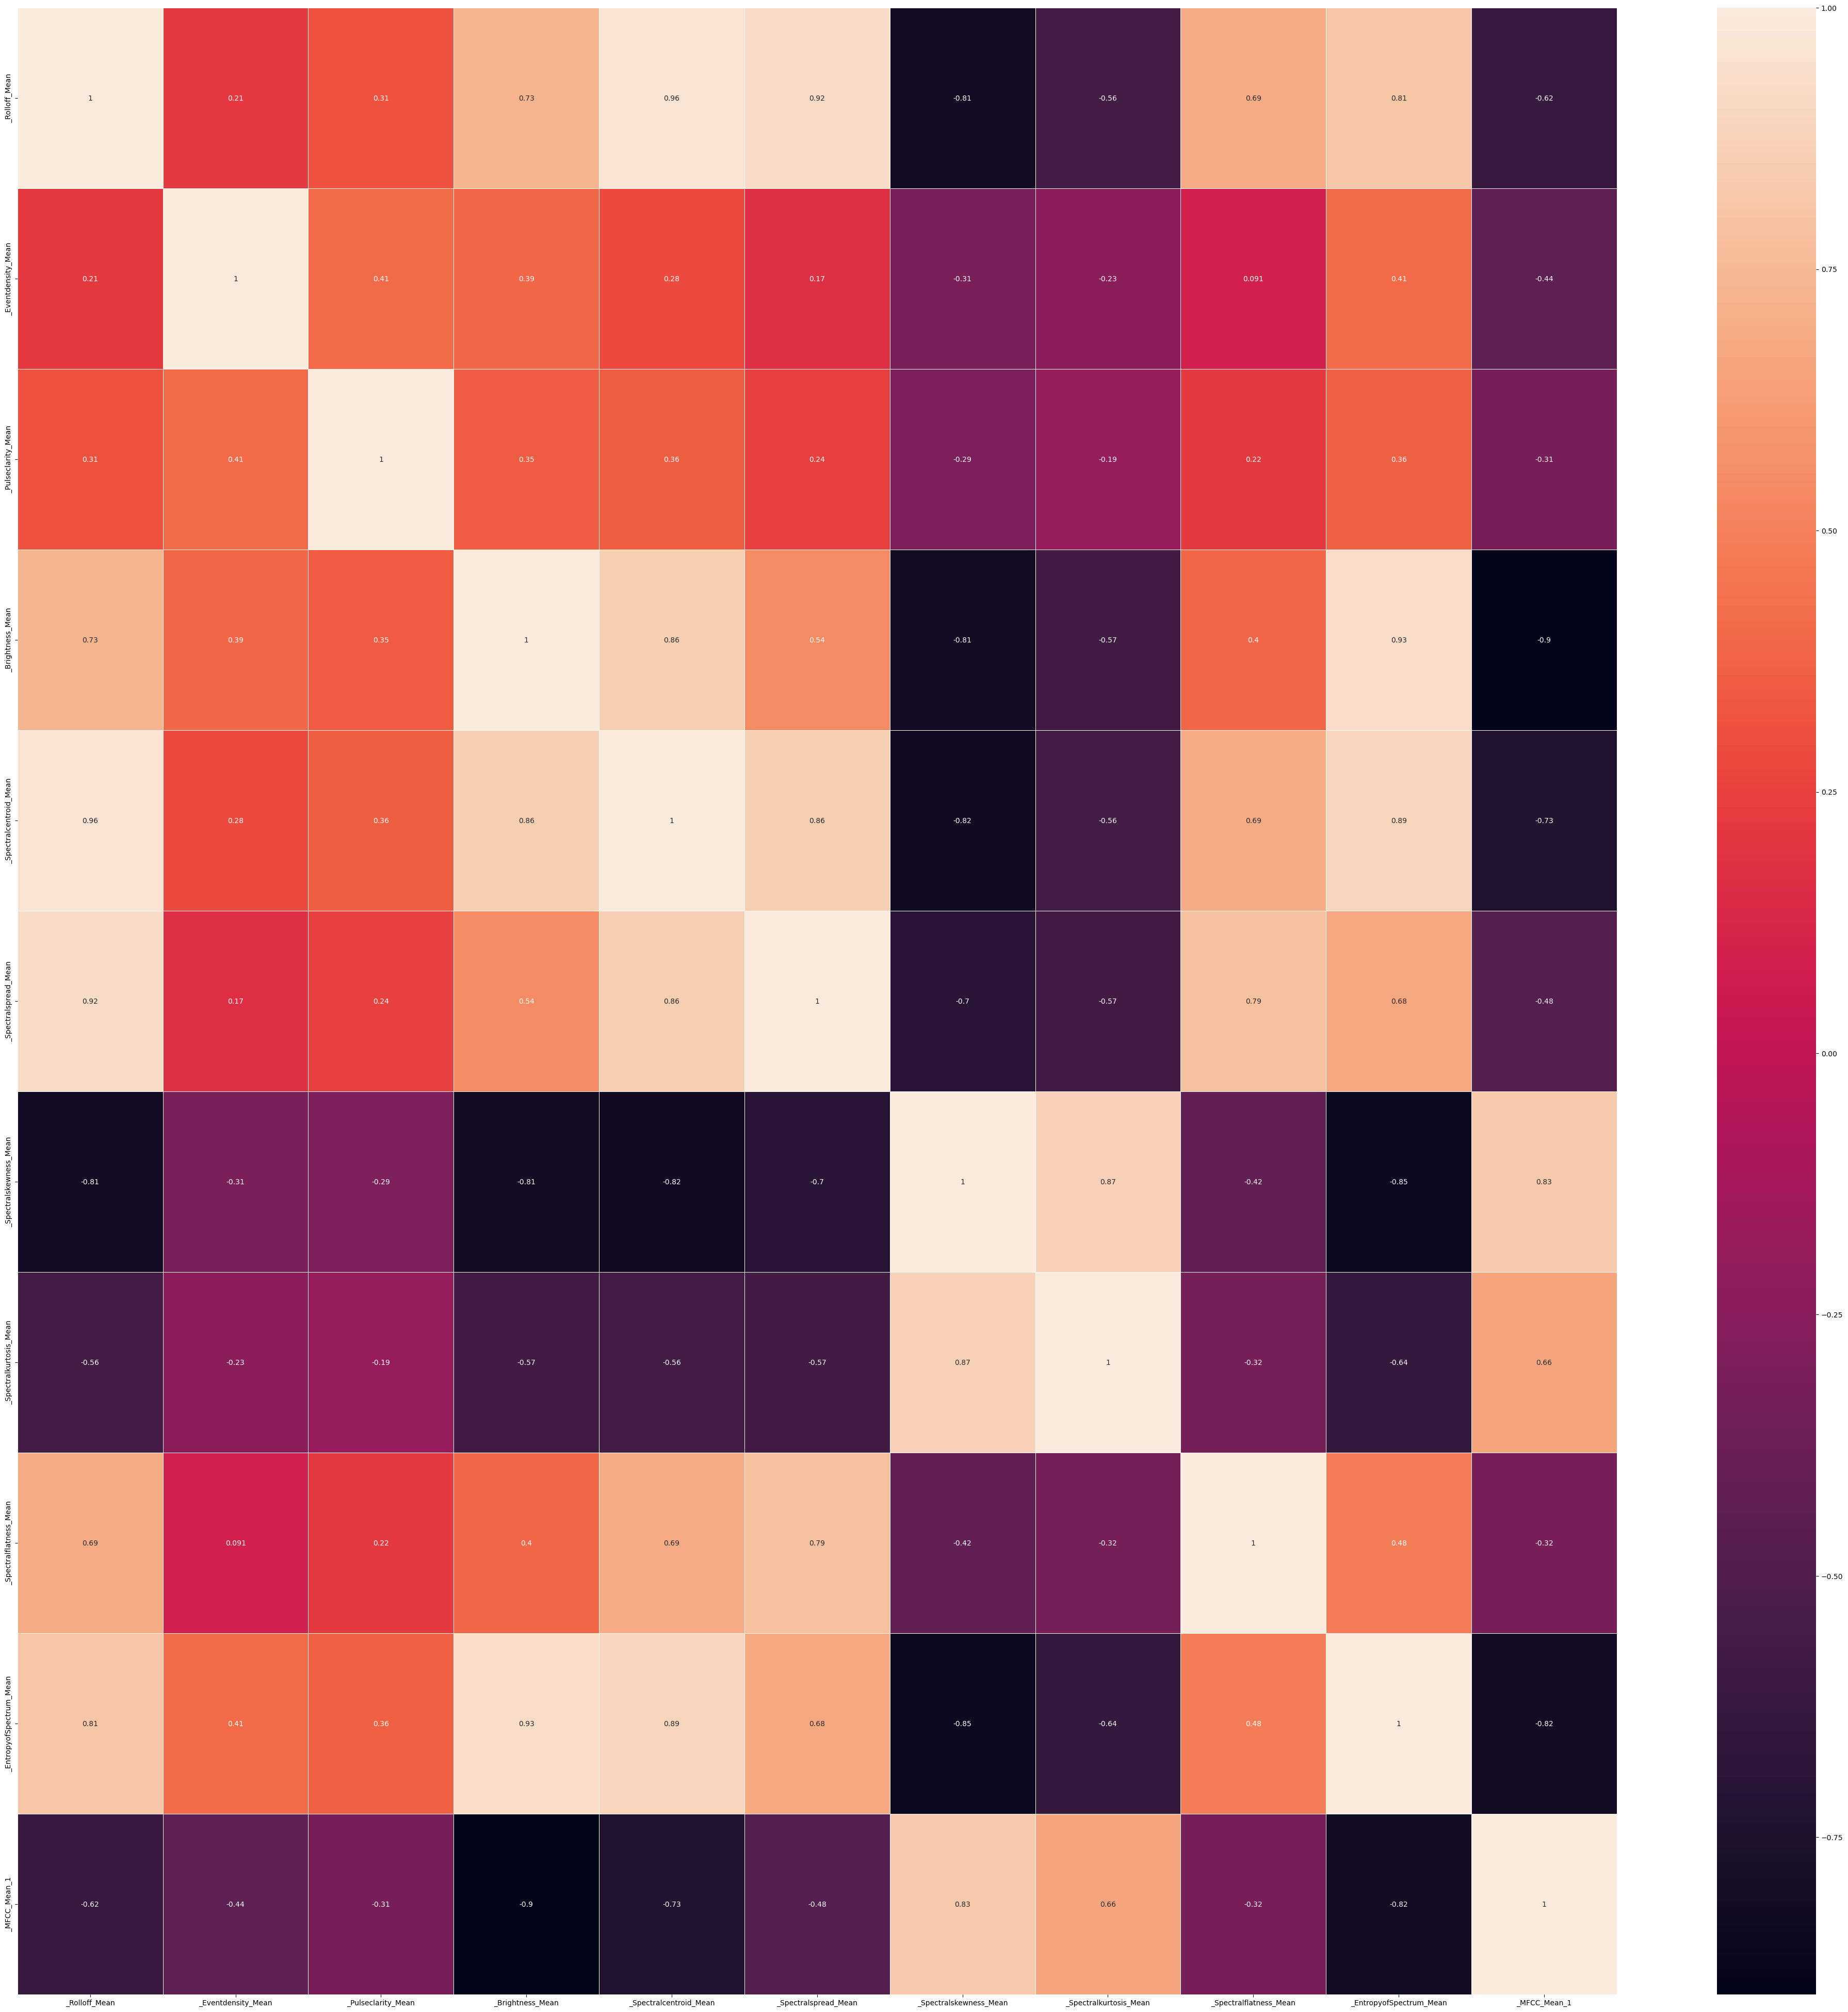

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

data = X[['_Rolloff_Mean','_Eventdensity_Mean','_Pulseclarity_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_Spectralflatness_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1']]
matrix = data.corr(method='pearson')
plt.figure(figsize=(50,50))
sns.heatmap(matrix, annot=True,linewidths=.5)
plt.show()

In [26]:
trial = X[['_Rolloff_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1']]
result = do_pca(trial,1)

In [27]:
X_with_PCA = X.drop(['_Rolloff_Mean','_Brightness_Mean','_Spectralcentroid_Mean','_Spectralspread_Mean','_Spectralskewness_Mean','_Spectralkurtosis_Mean','_EntropyofSpectrum_Mean','_MFCC_Mean_1'],axis=1)
X_with_PCA["PCA_Val"] = result

In [28]:
X_with_PCA

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,_MFCC_Mean_7,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,PCA_Val
0,-1.272863,0.724549,0.910332,0.184485,0.533531,1.342709,0.176184,0.194331,0.383737,-1.159007,...,1.143513,-1.063516,-0.825846,-0.221041,1.447311,0.166633,-0.794990,-2.447998,0.849226,-4.910212
1,-0.141269,-2.270546,-0.198455,0.542841,0.817391,0.998348,1.320472,1.910184,3.700735,-2.543376,...,1.143513,-1.088927,1.695816,-0.779237,0.384200,-0.791482,1.701411,-0.935784,0.074540,-6.073207
2,-1.365871,1.670369,1.561337,1.891824,1.535389,0.042915,1.076549,0.532379,0.490894,-1.680892,...,0.435849,-1.038105,1.741509,1.525571,2.255275,1.278046,-0.101486,-1.074519,-0.958374,3.065147
3,0.013743,0.961004,1.499939,-1.697403,2.739475,0.414284,1.155465,-0.881279,0.505506,-0.071288,...,1.143513,-0.577529,1.047552,1.687627,1.532360,0.396581,-1.524938,-0.366969,0.332769,-0.242623
4,-1.055845,0.724549,1.196106,-1.024616,0.283066,1.096254,0.240752,1.285306,1.197156,0.241843,...,-0.516990,2.087458,-1.111424,0.301142,1.447311,0.846895,-1.102619,-1.324242,-2.507745,-2.510837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.618294,0.468390,-0.837272,1.098253,-0.019347,0.772150,0.061397,0.419696,0.315546,0.758234,...,0.692168,0.222920,-0.757307,-0.094997,-1.125418,1.143910,0.980038,1.353348,0.590997,-0.765846
396,0.649296,-1.107976,-0.937947,1.645996,-0.414524,-0.497260,-0.143068,-0.789084,-0.001054,0.027595,...,1.143513,0.943959,-1.085722,-1.715565,-1.401827,1.383439,1.701411,1.519830,0.074540,2.820960
397,0.819810,0.054594,-1.081512,0.301685,0.910155,1.319076,-0.508954,0.312135,0.851331,1.197716,...,-1.129927,-0.177304,-0.825846,-1.067338,-0.763960,1.057680,1.701411,0.687419,-1.216602,1.796603
398,0.091250,0.369867,-1.196183,-0.298621,-0.529552,0.691124,0.215643,0.117501,0.110973,0.620896,...,1.143513,-0.123306,-0.714470,-0.923287,-1.040369,0.578622,1.701411,0.576431,0.590997,0.401799


## Train

Epoch 1, Loss: 1.2583, Accuracy: 0.4923
Epoch 2, Loss: 0.9846, Accuracy: 0.6443
Epoch 3, Loss: 0.7999, Accuracy: 0.7320
Epoch 4, Loss: 0.6768, Accuracy: 0.7603
Epoch 5, Loss: 0.5968, Accuracy: 0.8041
Epoch 6, Loss: 0.5314, Accuracy: 0.8144
Epoch 7, Loss: 0.4831, Accuracy: 0.8351
Epoch 8, Loss: 0.4403, Accuracy: 0.8454
Epoch 9, Loss: 0.4051, Accuracy: 0.8660
Epoch 10, Loss: 0.3778, Accuracy: 0.8814
Epoch 11, Loss: 0.3542, Accuracy: 0.8789
Epoch 12, Loss: 0.3310, Accuracy: 0.8918
Epoch 13, Loss: 0.3123, Accuracy: 0.9098
Epoch 14, Loss: 0.2967, Accuracy: 0.9098
Epoch 15, Loss: 0.2812, Accuracy: 0.9201
Epoch 16, Loss: 0.2668, Accuracy: 0.9201
Epoch 17, Loss: 0.2532, Accuracy: 0.9227
Epoch 18, Loss: 0.2418, Accuracy: 0.9278
Epoch 19, Loss: 0.2317, Accuracy: 0.9356
Epoch 20, Loss: 0.2229, Accuracy: 0.9356
Epoch 21, Loss: 0.2153, Accuracy: 0.9381
Epoch 22, Loss: 0.2068, Accuracy: 0.9485
Epoch 23, Loss: 0.2014, Accuracy: 0.9510
Epoch 24, Loss: 0.1930, Accuracy: 0.9536
Epoch 25, Loss: 0.1862, A

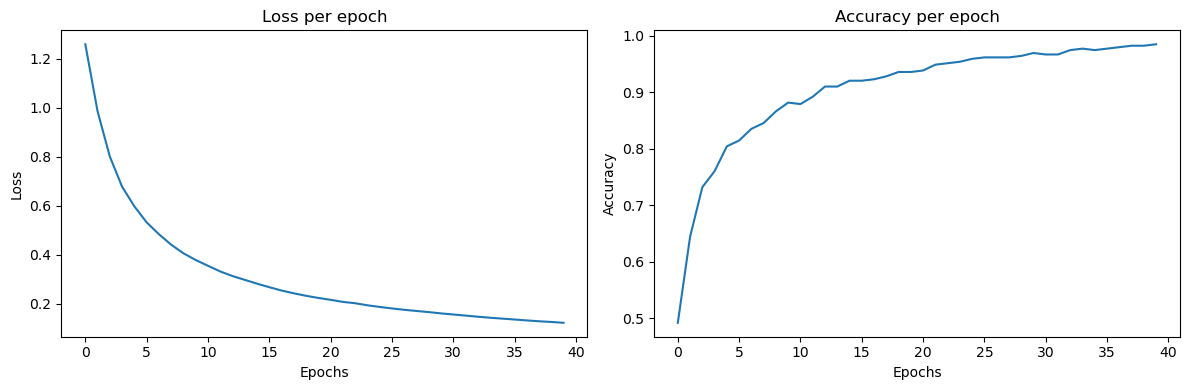

In [29]:

import matplotlib.pyplot as plt
# Create an instance of the neural network with 10 input features, 5 hidden units, and 3 output classes
nn = NeuralNetwork(X.shape[1], 8, y.shape[1], 0.1)

# Train the neural network for 20 epochs
losses , accuracies = nn.train(X.to_numpy(), y.to_numpy(), 40)

# Plotting the loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()